In [115]:
import numpy as np
import sympy as sp
from scipy.spatial.transform import Rotation as R
from scipy import special
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
#Perfect size for jupyter
plt.rcParams["figure.figsize"] = 12.8, 9.6

In [116]:
# Sets up angles theta and pi ranging from 0 to 2 pi and 0 to pi respectively, then makes a 2d grid for every combination
# of theta and pi
theta, phi = np.linspace(0, 2 * np.pi, 40),np.linspace(0, np.pi, 40)
THETA, PHI = np.meshgrid(theta, phi)

In [117]:
# Imports text file with legendre functions and extracts l and m, in this case 
# I extracted data for two legendre functions to use later (m = 1, l = 1 & m)

legdata = pd.read_csv('Legendre.txt', sep='=')
legdata.columns = ['lm', 'formula']

lm = str(legdata.lm[2])
l = float(lm[0])
m = float(lm[1])

legendre = str(legdata.formula[2])

lm2 = str(legdata.lm[4])
l2 = float(lm[0])
m2 = float(lm[1])

legendre2 = str(legdata.formula[4])

#### The text file looks like this:
ml=formula <br>
00=1 <br>
10=np.cos(THETA) <br>
11=-np.sin(THETA) <br>
20=0.5*(3*np.cos(THETA) ** 2 - 1) <br>
21=-3 * np.sin(THETA) * np.cos(THETA) <br>

###### Spherical Harmonics **Y** with Legendre functions **P** <br>
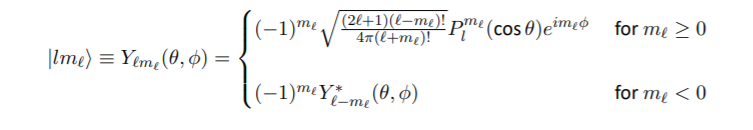

In [118]:
# Sets up general formula for spherical harmonics (see above) to use in spherical harmonics,
# as an example I used m = 2, l = 1. Then sets up x,y,z in spherical coordinates. Granted I only defined it for m >= 0

a = (2*l + 1)
b = float(sp.factorial(l-m))
c = float(sp.factorial(l+m))
d = 4 * np.pi

sphericalhar = np.imag((-1)** m * np.sqrt((a*b)/(c*d)) * eval(legendre) * np.cos(THETA) * np.exp(m*1j*PHI))

x = sphericalhar * np.sin(THETA) * np.cos(PHI)
y = sphericalhar * np.sin(PHI) * np.sin(THETA)
z = sphericalhar * np.cos(THETA)

sphericalhar = np.real((-1)** m * np.sqrt((a*b)/(c*d)) * eval(legendre) * np.cos(THETA) * np.exp(m*1j*PHI))

rx = sphericalhar * np.sin(THETA) * np.cos(PHI)
ry = sphericalhar * np.sin(PHI) * np.sin(THETA)
rz = sphericalhar * np.cos(THETA)


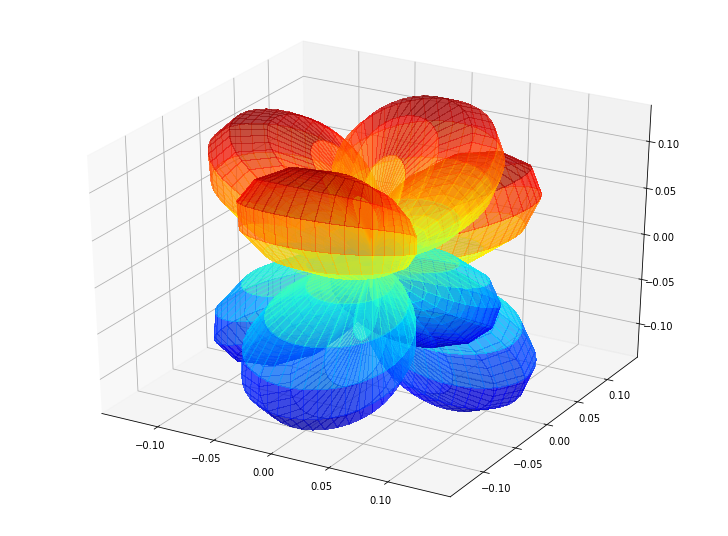

In [119]:
# Making the surface plot for l = 1, m = 1. I plotted, the real and imaginary parts separately, since that seemed
# like the only way matplotlib could handle them
fig = plt.figure()

ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(x,y,z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
               linewidth=0, antialiased = False, alpha=0.5)
ax.plot_surface(rx,ry,rz, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
               linewidth=0, antialiased = False, alpha=0.5)

plt.show()

In [120]:
# Now for l = 2, m = 1 I do the same thing as before to get spherical harmonics

l = l2
m = m2
legendre = legendre2

a = (2*l + 1)
b = float(sp.factorial(l-m))
c = float(sp.factorial(l+m))
d = 4 * np.pi

sphericalhar = np.imag((-1)** m * np.sqrt((a*b)/(c*d)) * eval(legendre) * np.cos(THETA) * np.exp(m*1j*PHI))

x = sphericalhar * np.sin(THETA) * np.cos(PHI)
y = sphericalhar * np.sin(PHI) * np.sin(THETA)
z = sphericalhar * np.cos(THETA)

sphericalhar = np.real((-1)** m * np.sqrt((a*b)/(c*d)) * eval(legendre) * np.cos(THETA) * np.exp(m*1j*PHI))

rx = sphericalhar * np.sin(THETA) * np.cos(PHI)
ry = sphericalhar * np.sin(PHI) * np.sin(THETA)
rz = sphericalhar * np.cos(THETA)

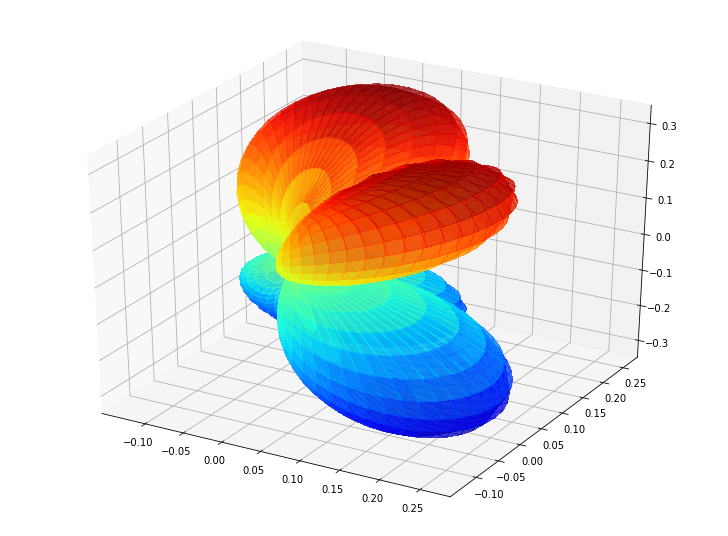

In [121]:
# And another surface plot with real and imaginary parts plotted separately (l = 2, m = 1)

fig = plt.figure()

ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(x,y,z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
               linewidth=0, antialiased = False, alpha=0.5)
ax.plot_surface(rx,ry,rz, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
               linewidth=0, antialiased = False, alpha=0.5)

plt.show()

###### The lobes seem to have the right shape but are offset by a 90 degree angle with respect to the z-axis. I'll come back to it.